<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
!pip install statsmodels

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install pandas

In [ ]:
!pip install sklearn

In [ ]:
!pip install yfinance

In [8]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose

#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [11]:
df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df.tail(2018)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...
2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2018 entries, 2012-01-03 to 2020-01-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2018 non-null   float64
 1   High       2018 non-null   float64
 2   Low        2018 non-null   float64
 3   Close      2018 non-null   float64
 4   Adj Close  2018 non-null   float64
 5   Volume     2018 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.4 KB


In [13]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))

In [14]:
start_date = datetime(2017,5,5)
end_date = datetime(2020,1,9)
lim_df = df[start_date:end_date]

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699.0
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108.0
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805.0
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412.0
2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN


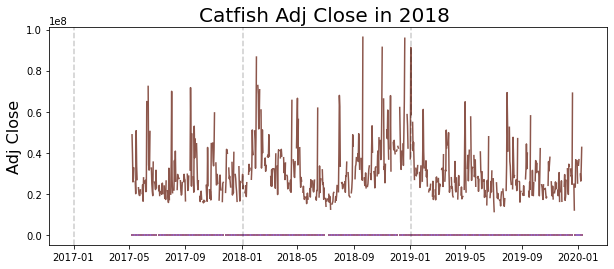

In [16]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.title('Catfish Adj Close in 2018 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-03'), color='k', linestyle='--', alpha=0.2)

In [17]:
first_diff = lim_df.diff()[1:]

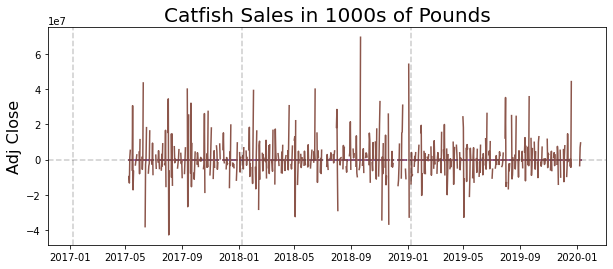

In [18]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-09'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [19]:
train_end = datetime(2017,5,5)
test_end = datetime(2020,1,9)

train_data = lim_df[:train_end]
test_data = lim_df[train_end + timedelta(days=1):test_end]


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



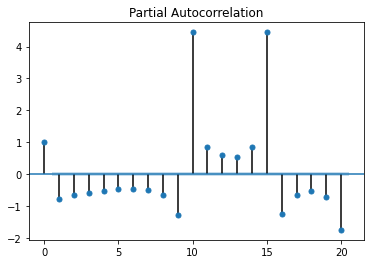

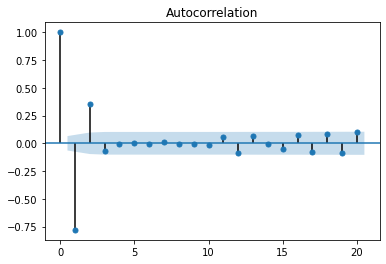

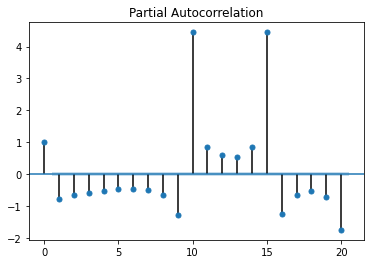

In [74]:
#ACF plot and PACF plot with 99% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df['Adj Close'], lags=20, alpha=0.01)
plot_pacf(df['Adj Close'], lags=20, alpha=0.01)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



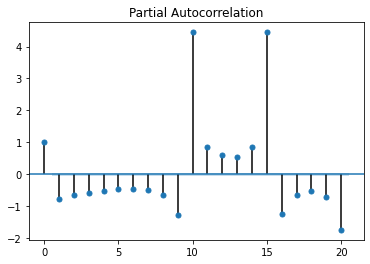

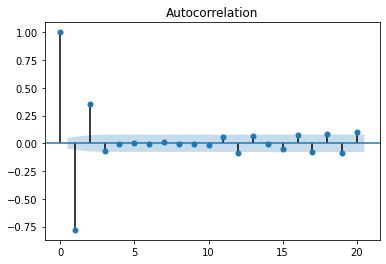

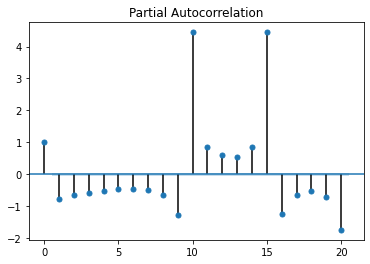

In [75]:
#ACF plot and PACF plot with 95% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df['Adj Close'], lags=20, alpha=0.05)
plot_pacf(df['Adj Close'], lags=20, alpha=0.05)

In [77]:
#ACF values and PACF values
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
print(acf(df['Adj Close']))
print(pacf(df['Adj Close']))

[ 1.         -0.78014786  0.35176481 -0.0698113  -0.00444349  0.00564823
 -0.01080153  0.01341967 -0.00360711 -0.00236953 -0.0179788   0.05978279
 -0.08480989  0.06160053 -0.00273389 -0.05202495  0.07859264 -0.0822994
  0.0808699  -0.08731983  0.10172854 -0.11165858  0.10862051 -0.10113766
  0.09708487 -0.08377656  0.0496288  -0.0153329   0.01189642 -0.03162666
  0.03194418  0.00827588 -0.05621189  0.06012257 -0.01150098 -0.04656322
  0.07577182 -0.0800311   0.07672203 -0.06100574  0.02262399]
[  1.          -0.78064477  -0.65846689  -0.57843127  -0.52653012
  -0.4698216   -0.44939228  -0.49724563  -0.6555806   -1.27064017
   4.44703029   0.84772881   0.59116486   0.545536     0.85461353
   4.4453658   -1.25400004  -0.65945721  -0.51436372  -0.72092023
  -1.74168796   2.17587281   0.76254934   0.54408714   0.61847108
   1.16018465  -6.31948362  -0.89597645  -0.57923908  -0.56651256
  -0.96196585 -19.4066861    1.04216926   0.58689293   0.59085345
   0.79917534   3.28793036  -1.35218617

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



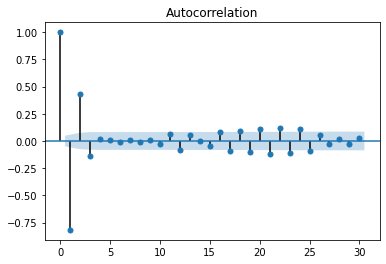

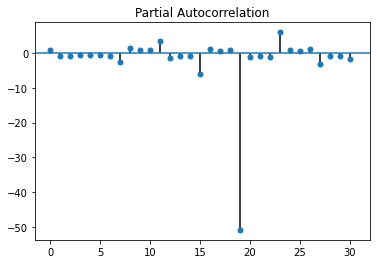

In [79]:
from statsmodels.tsa.stattools import pacf

#Differencing
data_df = df.diff()
data_df = data_df.dropna()
data_df

#plot ACF
#plot_acf(test_data, lags=30)
plot_acf(data_df['Adj Close'], lags= 30)

#plot the PACF
#plot_pacf(data_df['Adj Close'], lags=30)
plot_pacf(data_df['Adj Close'], lags=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



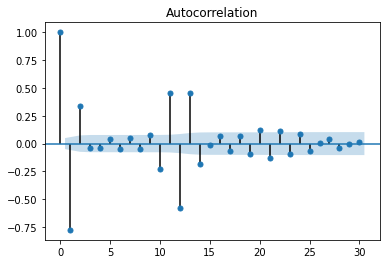

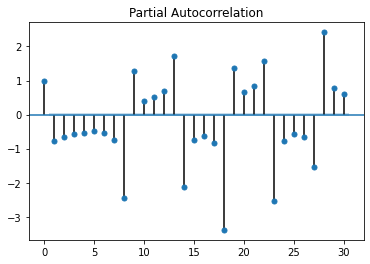

In [82]:
from statsmodels.tsa.stattools import pacf

#Seasonal differencing
data_df = df.diff(12)
data_df = data_df.dropna()

#plot ACF
plot_acf(data_df['Adj Close'], lags= 30)

#plot PACF
plot_pacf(data_df['Adj Close'], lags=30)
plt.show()

In [88]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(df['Adj Close'], order=(1,1,1),
                                  seasonal_order=(1,1,1,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                 1571
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5853.456
Date:                            Tue, 18 Jan 2022   AIC                          11716.913
Time:                                    10:38:36   BIC                          11743.623
Sample:                                         0   HQIC                         11726.849
                                           - 1571                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7777      0.010    -75.622      0.000      -0.798      -0.758
ma.L1         -1.0000     18.571   

In [89]:
results.plot_diagnostics(figsize=(18.8))
plt.show()

TypeError: ignored

In [ ]:
pred2 = []
pred2 = results.get_prediction(start=pd.to_datetime('2019-07-01'), end=pd.to_datetime('2019-07-31'), dynamic=False)
pred2 = pred2.predicted_mean.apply(np.exp)
print(pred2)

In [ ]:
# Forcast 50 steps ahead
forecast_values = results.get_forcast(steps= 50)

# Confidence Intervals of the forecasted values
forecast_ci = forcast_values.conf_int()

In [ ]:
# Forcast 12 steps ahead
forcast_values = results.get_forcast(steps= 12)

#Prediction summary
forecast_values.summary_frame()

In [ ]:
#Prediction
forecast_values.predicted_mean

In [ ]:
#Confidence interval
forecast_values.conf_int()

In [ ]:
#plot the data
ax = df.plot()

#plot the forecasted values
forcast_values.predicted_mean.plot(ax=ax, label= 'Forecasts')

#Plot the Confidence Intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1],
                color='g', alpha=.5)

#Axes labels and Title
ax.set_xlabel('Time')
ax.set_ylabel('Adj Close')
ax.set_title('SARIMA FORECAST')

#Legends
plt.legend()
